In [1]:
import numpy as np
import pandas as pd
import csv
import os, sys, random, math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.distributions import uniform, expon, norm
from statsmodels.distributions.empirical_distribution import ECDF

## Task 1 ##
Load the data file, find two observed data groups and separate them. Describe these two data groups. For each group find mean, variance and median.

In [2]:
# Data read from CSV and saved to various variables

df = pd.read_csv("../data/data.csv", delimiter=";")

# Dataframes
af = df["Affected"]
un = df["Unaffected"]

# NumPy arrays
af_np = np.array(af)
un_np = np.array(un)

# Lists
af_list = list(af)
un_list = list(un)

In [3]:
# Additional helper values required during the computations

# Sizes of the samples
af_size = len(af_list)
un_size = len(un_list)

# Upper and Lower bounds of values of each sample
af_lb = math.floor(min(af_list))
af_ub = math.ceil(max(af_list))

un_lb = math.floor(min(un_list))
un_ub = math.ceil(max(un_list))

print('Size of the af supplement:', af_size)
print('Lower bound:', af_lb)
print('Upper bound:', af_ub)

print()

print('Size of the un supplement:', un_size)
print('Lower bound:', un_lb)
print('Upper bound:', un_ub)

Size of the af supplement: 15
Lower bound: 1
Upper bound: 3

Size of the un supplement: 15
Lower bound: 1
Upper bound: 3


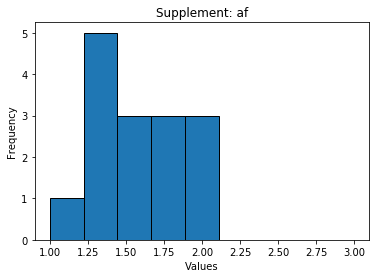

Mean: 1.5599999984105428
Variance: 0.08470666817983077
Median: 1.5900000333786002


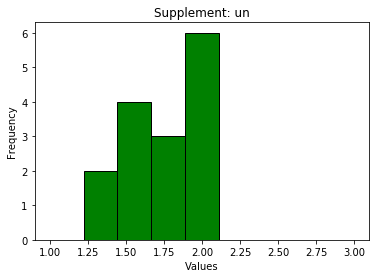

Mean: 1.7586666504542028
Variance: 0.054851546121810896
Median: 1.7699999809265101


In [4]:
# Setting parameters for the histogram describing supplement af

plt.hist(af_np, 9, (af_lb,af_ub), edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Supplement: af')
plt.show()

# Calculating mean, variance and median of supplement af

af_mean = np.mean(af_np)
af_var = np.var(af_np)
af_median = np.median(af_np)

print("Mean:", af_mean)
print("Variance:", af_var)
print("Median:", af_median)

# Setting parameters for the histogram describing supplement un

plt.hist(un_np, 9, (un_lb,un_ub), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Supplement: un')
plt.show()

# Calculating mean, variance and median of supplement un

un_mean = np.mean(un_np)
un_var = np.var(un_np)
un_median = np.median(un_np)

print("Mean:", un_mean)
print("Variance:", un_var)
print("Median:", un_median)

## Task 2

For each group try to find probability density function (based on histogram) and distribution function (based on ecdf).

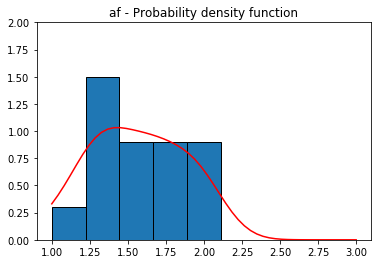

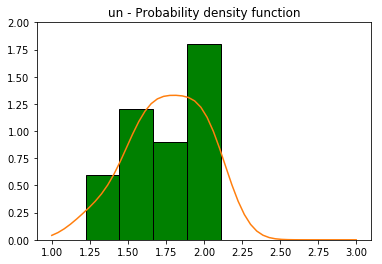

In [5]:
# Non-parametric probability density function of af

nparam_density = stats.kde.gaussian_kde(af.values.ravel())
x = np.linspace(af_lb, af_ub)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(af.values, 9, (af_lb,af_ub), density=True, edgecolor = 'black')
ax.plot(x, nparam_density, color = 'r')
ax.set_ylim([0, 2])
plt.title('af - Probability density function')
plt.show()

# Non-parametric probability density function of un

nparam_density = stats.kde.gaussian_kde(un.values.ravel())
x = np.linspace(un_lb, un_ub)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(un.values, 9, (un_lb,un_ub), density=True, facecolor = 'g', edgecolor = 'black')
ax.plot(x, nparam_density)
ax.set_ylim([0, 2])
plt.title('un - Probability density function')
plt.show()

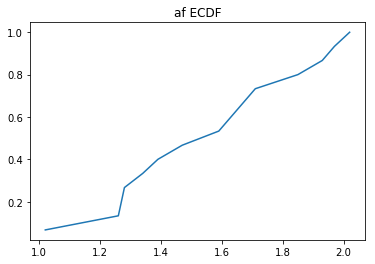

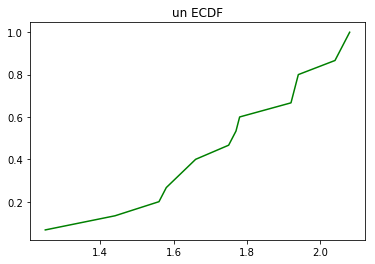

In [6]:
# Empiric distribution function fo af

ecdf = ECDF(af_np)
plt.plot(ecdf.x, ecdf.y)
plt.title('af ECDF')
plt.show()

# Empiric distribution function fo un

ecdf = ECDF(un_np)
plt.plot(ecdf.x, ecdf.y, color = 'g')
plt.title('un ECDF')
plt.show()

## Task 3 ##

* For each group find probability distribution.
   1. Approximate parameters of normal, exponential and uniform distribution.
   2. Add appropriate probability density functions (PDF) with estimated parameters to the histogram graphs.
   3. Discuss which of the distribution is best to reflect observed data.

### Normal distribution ###

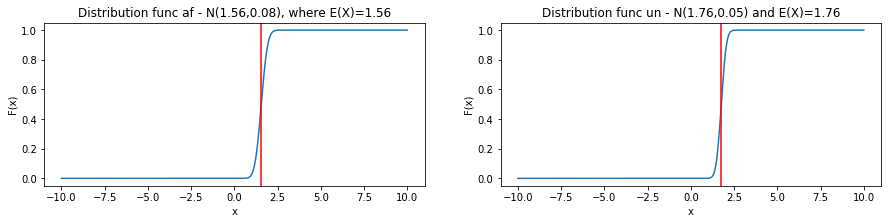

In [38]:
af_sigma = np.sqrt(af_var)
un_sigma = math.sqrt(un_var)

plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
x = np.linspace(-10, 10, 1000)
plt.plot(x, norm.cdf(x, loc=af_mean, scale=af_sigma))
plt.axvline(af_mean, color='r')
plt.title('Distribution func af - N({0:.2f},{1:.2f}), where E(X)={2:.2f}'.format(af_mean, af_var, af_mean))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, norm.cdf(x, loc=un_mean, scale=un_sigma))
plt.axvline(un_mean, color='r')
plt.title('Distribution func un - N({0:.2f},{1:.2f}) and E(X)={2:.2f}'.format(un_mean, un_var, un_mean))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()

### Exponential distribution ###

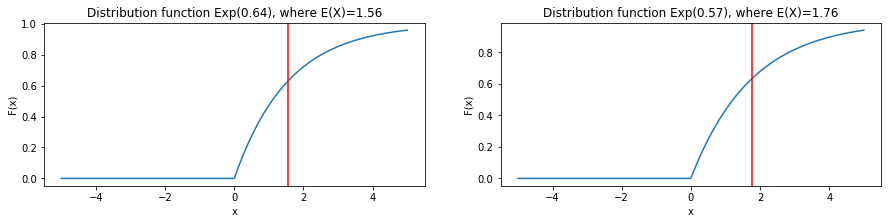

In [36]:
af_lambda = 1 / af_mean
un_lambda = 1 / un_mean

plt.figure(figsize=(15,3))
x = np.linspace(-5, 5, 1000)

plt.subplot(1,2,1)
plt.plot(x, expon.cdf(x, scale=af_mean))
plt.axvline(expon.mean(scale=af_mean), color='r')
plt.title('Distribution function Exp({0:.2f}), where E(X)={1:.2f}'.format(af_lambda, expon.mean(scale=af_mean)))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, expon.cdf(x, scale=un_mean))
plt.axvline(expon.mean(scale=un_mean), color='r')
plt.title('Distribution function Exp({0:.2f}), where E(X)={1:.2f}'.format(un_lambda, expon.mean(scale=un_mean)))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()

### Uniform distribution ###

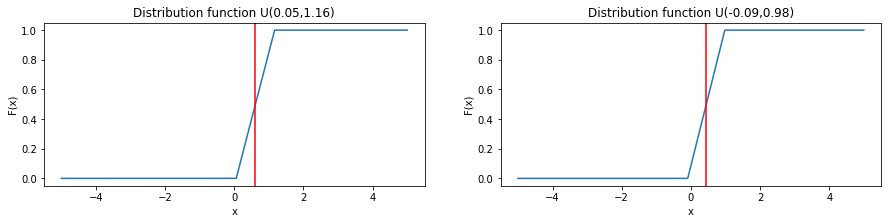

In [33]:
af_x = uniform.rvs(size=af_size)
af_m1 = af_x.mean()
af_m2 = np.mean(af_x**2)
af_a = af_m1 - np.sqrt(3 * (af_m2 - af_m1**2))
af_b = af_m1 + np.sqrt(3 * (af_m2 - af_m1**2))
af_scale = np.abs(af_b-af_a)

un_x = uniform.rvs(size=un_size)
un_m1 = un_x.mean()
un_m2 = np.mean(un_x**2)
un_a = un_m1 - np.sqrt(3 * (un_m2 - un_m1**2))
un_b = un_m1 + np.sqrt(3 * (un_m2 - un_m1**2))
un_scale = np.abs(un_b-un_a)

x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.plot(x, uniform.cdf(x, af_a, scale=af_scale))
plt.axvline(uniform.mean(af_a, scale=af_scale), color='r')
plt.title('Distribution function U({0:.2f},{1:.2f})'.format(af_a, af_b))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, uniform.cdf(x, un_a, scale=un_scale))
plt.axvline(uniform.mean(un_a, scale=un_scale), color='r')
plt.title('Distribution function U({0:.2f},{1:.2f})'.format(un_a, un_b))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()